<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/matplotlib_fluo_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fluorescence sample graphs
###prompt fluorescence


Upload .csv flie

In [ ]:
import io

from google.colab import files
uploaded = files.upload()

Saving Fluo_all.csv to Fluo_all.csv
Saving I_091204_091508.csv to I_091204_091508.csv


import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

read csv and setting the delimiter and decimal separator

renaming column names

Dataset is now stored in a Pandas Dataframe

In [ ]:
# PAM
#df_PAM = pd.read_csv(io.BytesIO(uploaded['I_091204_091508.csv']), delimiter=';', decimal='.')
df_PAM = pd.read_csv("/content/I_091204_091508.csv", delimiter=';', decimal='.')

In [ ]:
# PF
df_all = pd.read_csv("/content/Fluo_all.csv", delimiter=';', decimal=',')

In [ ]:
df_PF = df_all
df_DF = df_all
df_MR = df_all

df_PF = df_PF.drop(['MR820', 'time DF', 'DF'], axis = 1)
df_DF = df_DF.drop(['PF', 'time PF', 'MR820'], axis = 1)
df_MR = df_MR.drop(['PF', 'time DF', 'DF'], axis = 1)

In [ ]:
df_PF = df_PF.rename({ 'time PF': 'time' }, axis=1)
df_DF = df_DF.rename({ 'time DF': 'time' }, axis=1)
df_MR = df_MR.rename({ 'time PF': 'time' }, axis=1)

In [ ]:
#t = df_MR['MR820'][:144].str.replace(',', '.').astype(float)
#df_MR['MR820'][:144] = t
df_MR

,time,MR820
0,0.02,0.999864
1,0.03,0.999864
2,0.04,0.999877
3,0.05,0.999898
4,0.06,0.999877
...,...,...
144,NaN,NaN
145,NaN,NaN
146,NaN,NaN
147,NaN,NaN


specifying OKJIP points

In [ ]:
# PF
hl = df_PF.loc[df_PF['time'].isin([0.02, 0.2, 3, 30, 300])]
hl['points'] = ['O', 'K', 'J', 'I', 'P']
hl

<ipython-input-33-4d2c12d97196>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hl['points'] = ['O', 'K', 'J', 'I', 'P']


,time,PF,points
0,0.02,8.47067,O
18,0.20,15.34600,K
55,3.00,25.64500,J
82,30.00,40.84630,I
109,300.00,44.87770,P


In [ ]:
# PAM
df_PAM['Time'] = df_PAM['Time'] / 60

Drawing plot from the DataFrame

In [ ]:
def Draw_plot(df):
  time = df.columns.values[0]
  fluo = df.columns.values[1]

  df.plot(kind = 'line', color='black', x = time, y = fluo)

Formatting graph

In [ ]:
def Format_graph(fluo):
  #remove legend
  plt.legend('').remove()
  if fluo == 'PF':
    #graph title
    plt.title('Prompt fluorescence', fontweight="bold", fontsize=14)
    #convert x-axis to Logarithmic scale
    plt.xscale("log")
    #start y axis from 0
    plt.ylim(ymin=0)
    #format axis labels
    plt.xlabel('JIP-time [ms]', fontweight="bold", fontsize=12)
    plt.ylabel('fluorescence intensity [rel.u.] x${10^3}$', fontweight="bold", fontsize=10)
  if fluo == 'PAM':
    plt.xlim(xmin=0)
    plt.xlim(xmax=25)
    #graph title
    plt.title('PAM fluorescence', fontweight="bold", fontsize=14)
    #format axis labels
    plt.xlabel('time [min]', fontweight="bold", fontsize=12)
    plt.ylabel('fluorescence [a.u.]', fontweight="bold", fontsize=10)
  if fluo == 'MR820':
    #graph title
    plt.title('', fontweight="bold", fontsize=14)
    #convert x-axis to Logarithmic scale
    plt.xscale("log")
    #start y axis from 0
    ax1.set_ylim(ymin=0)
    ax3.set_ylim(.993, 1.0005)
    #format axis labels
    plt.xlabel('JIP-time [ms]', fontweight="bold", fontsize=12)
    ax1.set_ylabel('fluorescence intensity [rel.u.] x${10^3}$', fontweight="bold", fontsize=10)
    ax3.set_ylabel('MR/MR${_0}$ [rel.u.]', fontweight="bold", fontsize=10)

Formatting axes

In [ ]:
from matplotlib.ticker import MultipleLocator

def Ticker(n, ticker, axis):
  ml = MultipleLocator(n)
  if axis == 'x' and ticker == 'minor':
    plt.gca().xaxis.set_minor_locator(ml)
  if axis == 'y' and ticker == 'minor':
    plt.gca().yaxis.set_minor_locator(ml)
  if axis == 'x' and ticker == 'major':
    plt.gca().xaxis.set_major_locator(ml)
  if axis == 'y' and ticker == 'major':
    plt.gca().yaxis.set_major_locator(ml)

In [ ]:
def Format_axes():
  # For the X Axis
  plt.tick_params(
          axis="x",
      which="minor",
      direction='in',
      )

  plt.tick_params(
          axis="x",
      which="major",
      direction='inout',
      )

  # For the Y Axis
  plt.tick_params(
          axis="y",
      which="major",
      direction='inout',
      )

  plt.tick_params(
          axis="y",
      which="minor",
      #length=10,
      #color="b",
      direction='in',
      #labelrotation=45.0
      )

### Prompt fluorescence

Inserting OKJIP points and visualize

In [ ]:
def Draw_points():
  x = hl['time'].to_numpy()
  y = hl['PF'].to_numpy()
  for i, txt in enumerate(hl['points']):
    plt.annotate(txt, (x[i], y[i]), weight='bold', xytext=(x[i], y[i]-5), size=14)

In [ ]:
plt.rcParams["figure.dpi"] = 600 # resolution 600 dpi

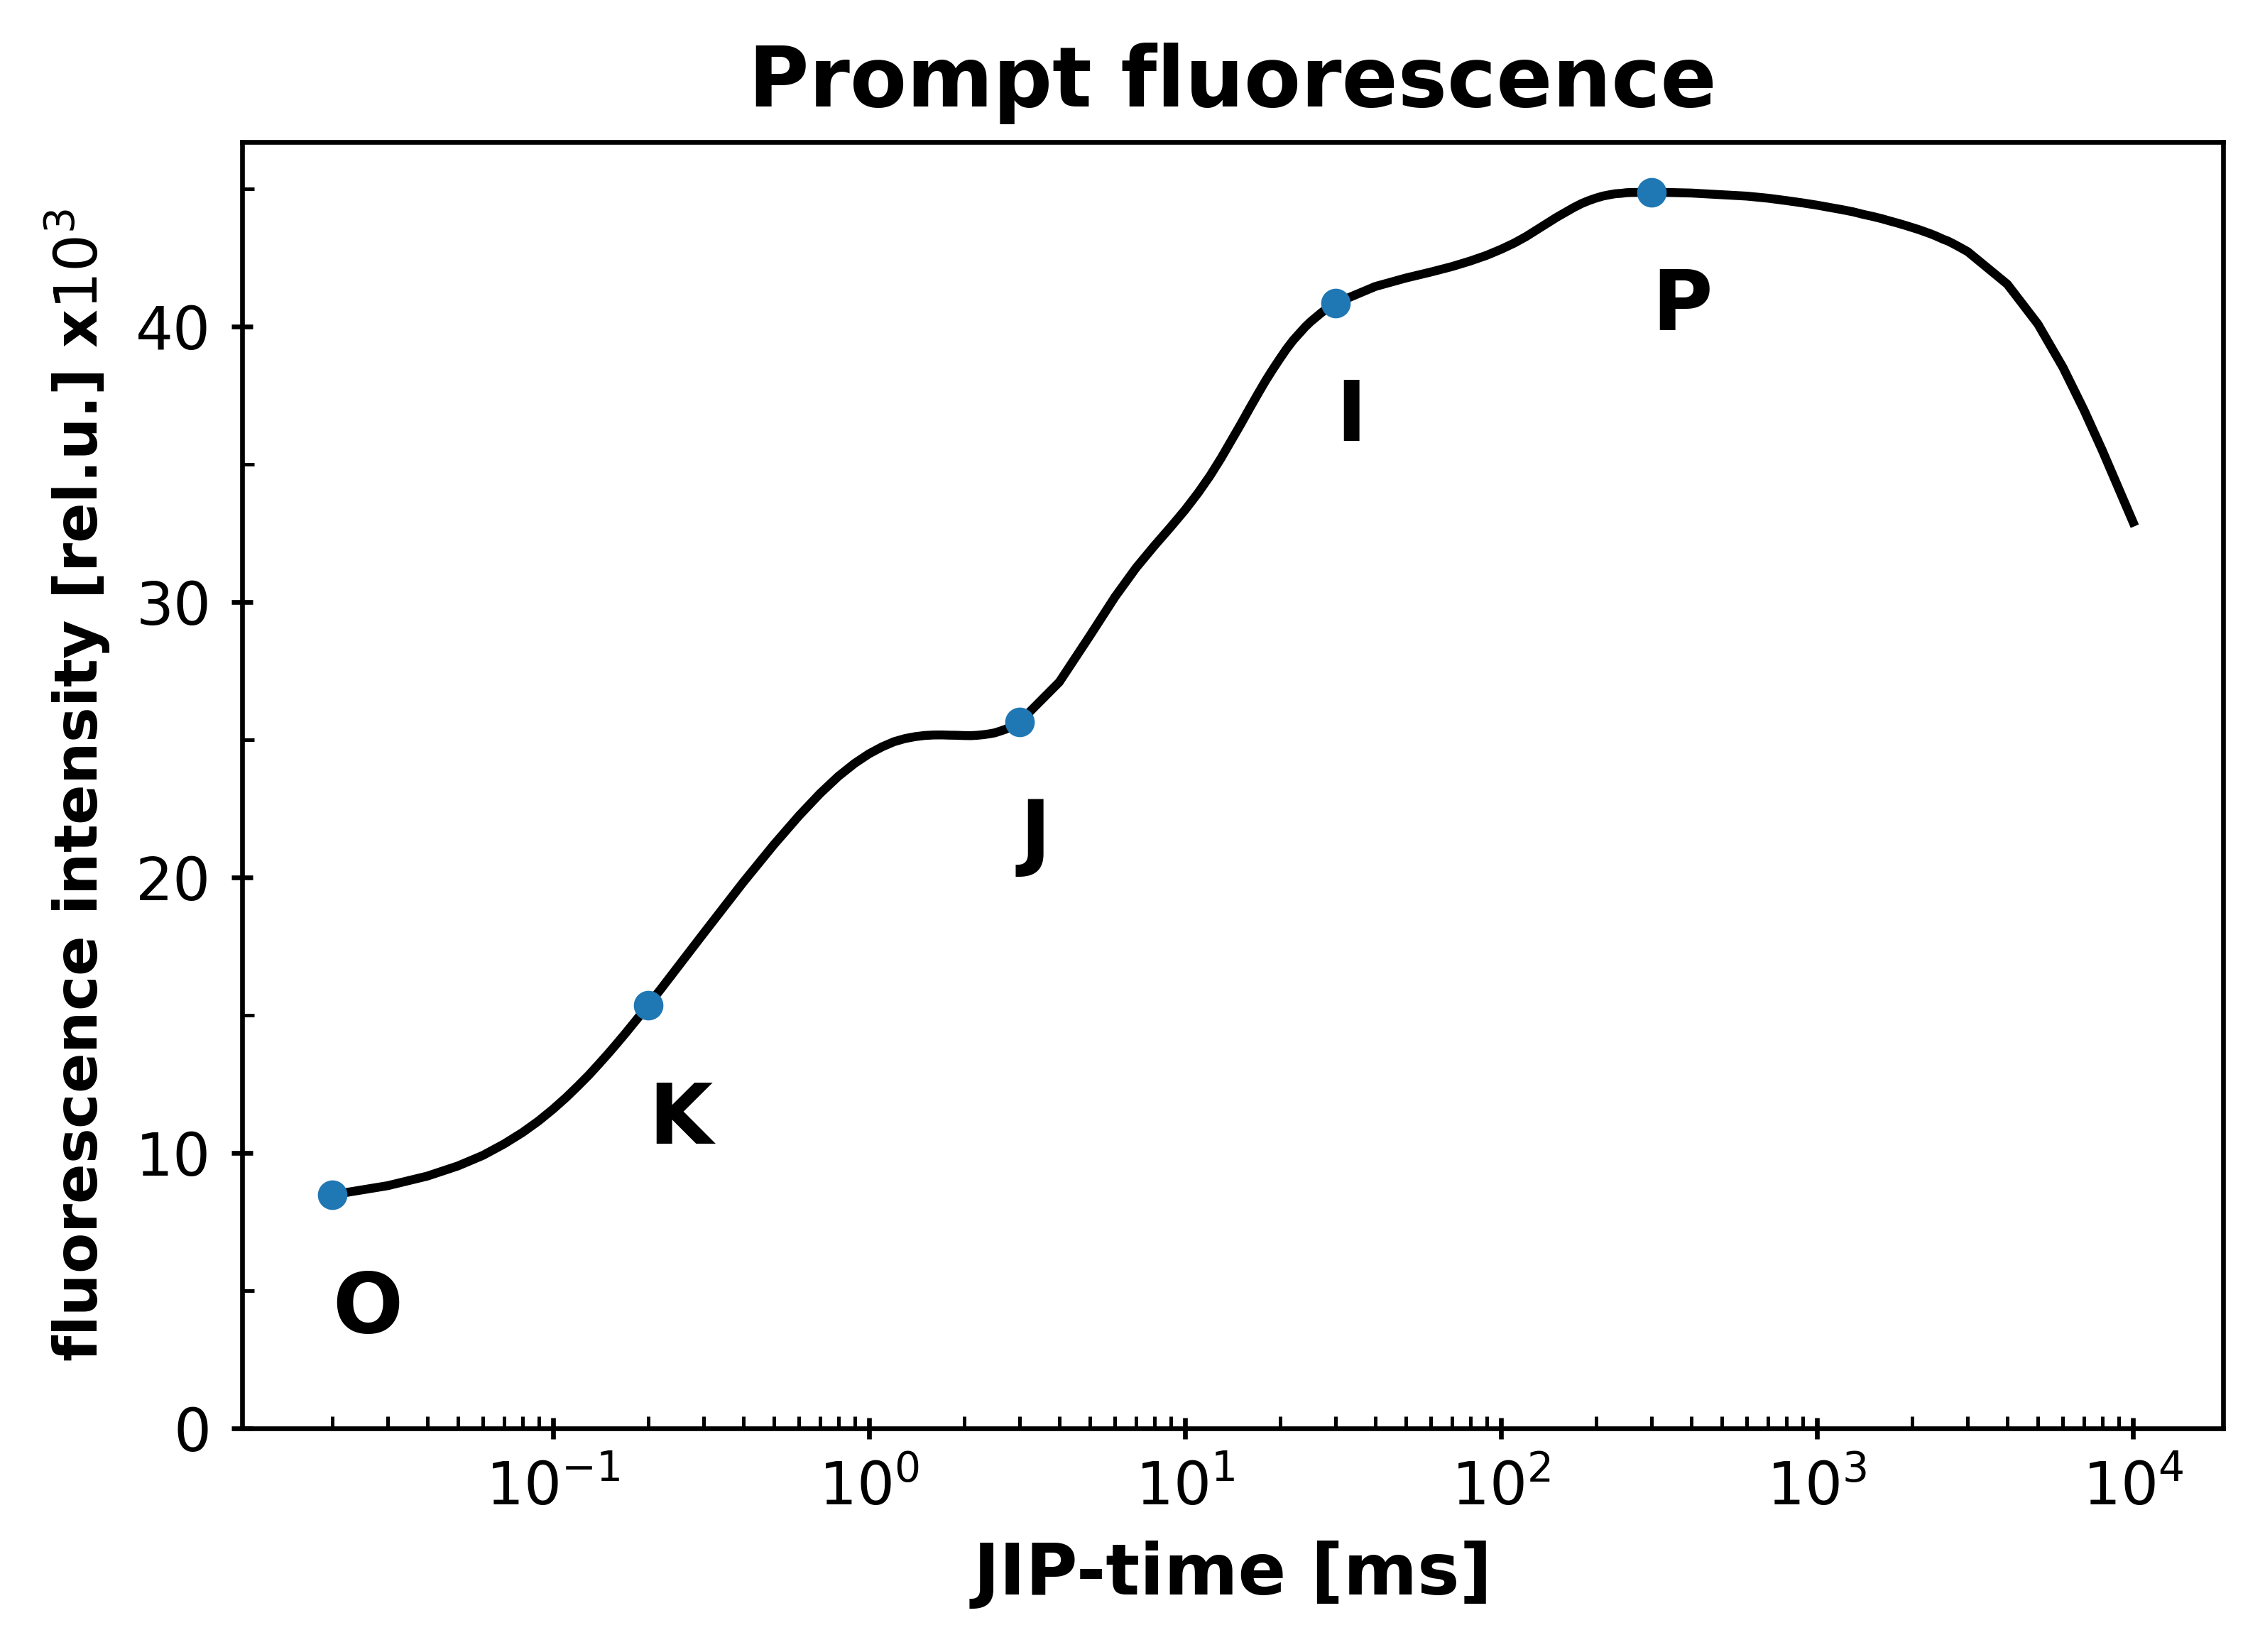

In [ ]:
Draw_plot(df_PF)

Format_graph('PF')
Format_axes()
Ticker(5, 'minor', 'y')

plt.plot(hl['time'], hl['PF'], marker="o", ls="", ms=4)

Draw_points()

plt.show()

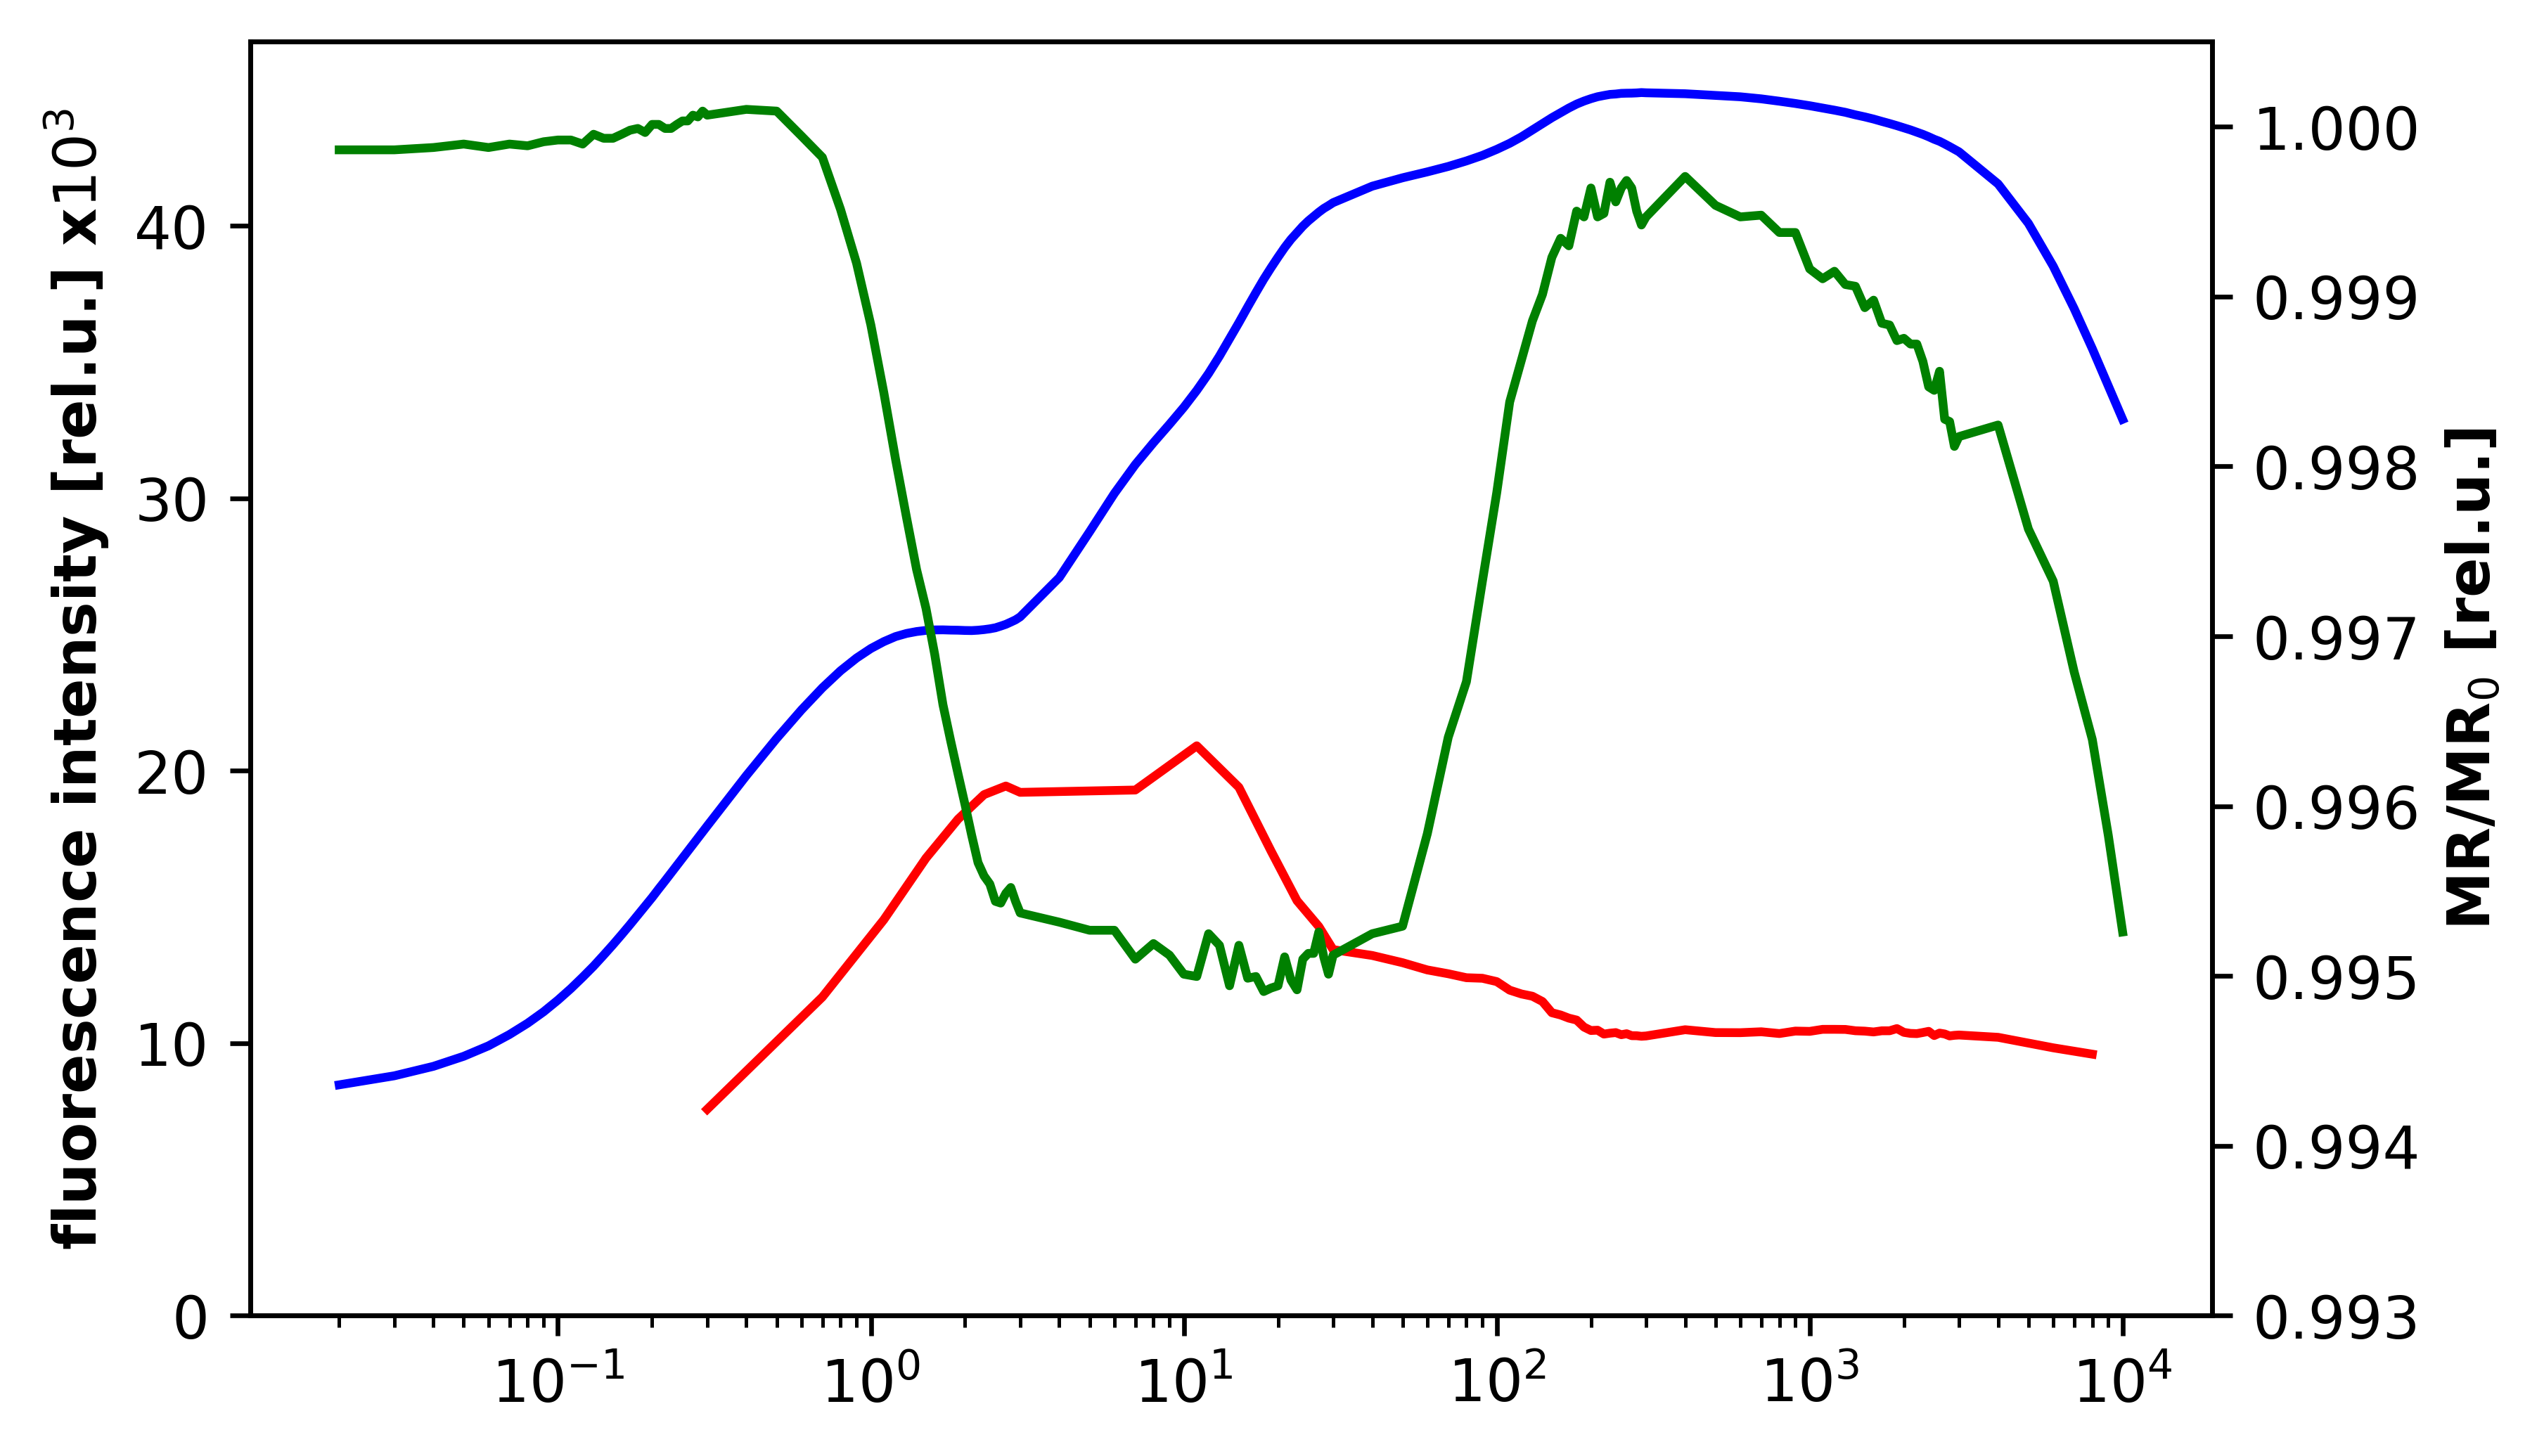

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(df_DF['time'], df_DF['DF'], color='red')
ax1.plot(df_PF['time'], df_PF['PF'], color='blue')

ax3 = ax1.twinx()
ax3.plot(df_PF['time'], df_MR['MR820'], color='green')

Format_graph('MR820')

plt.show()

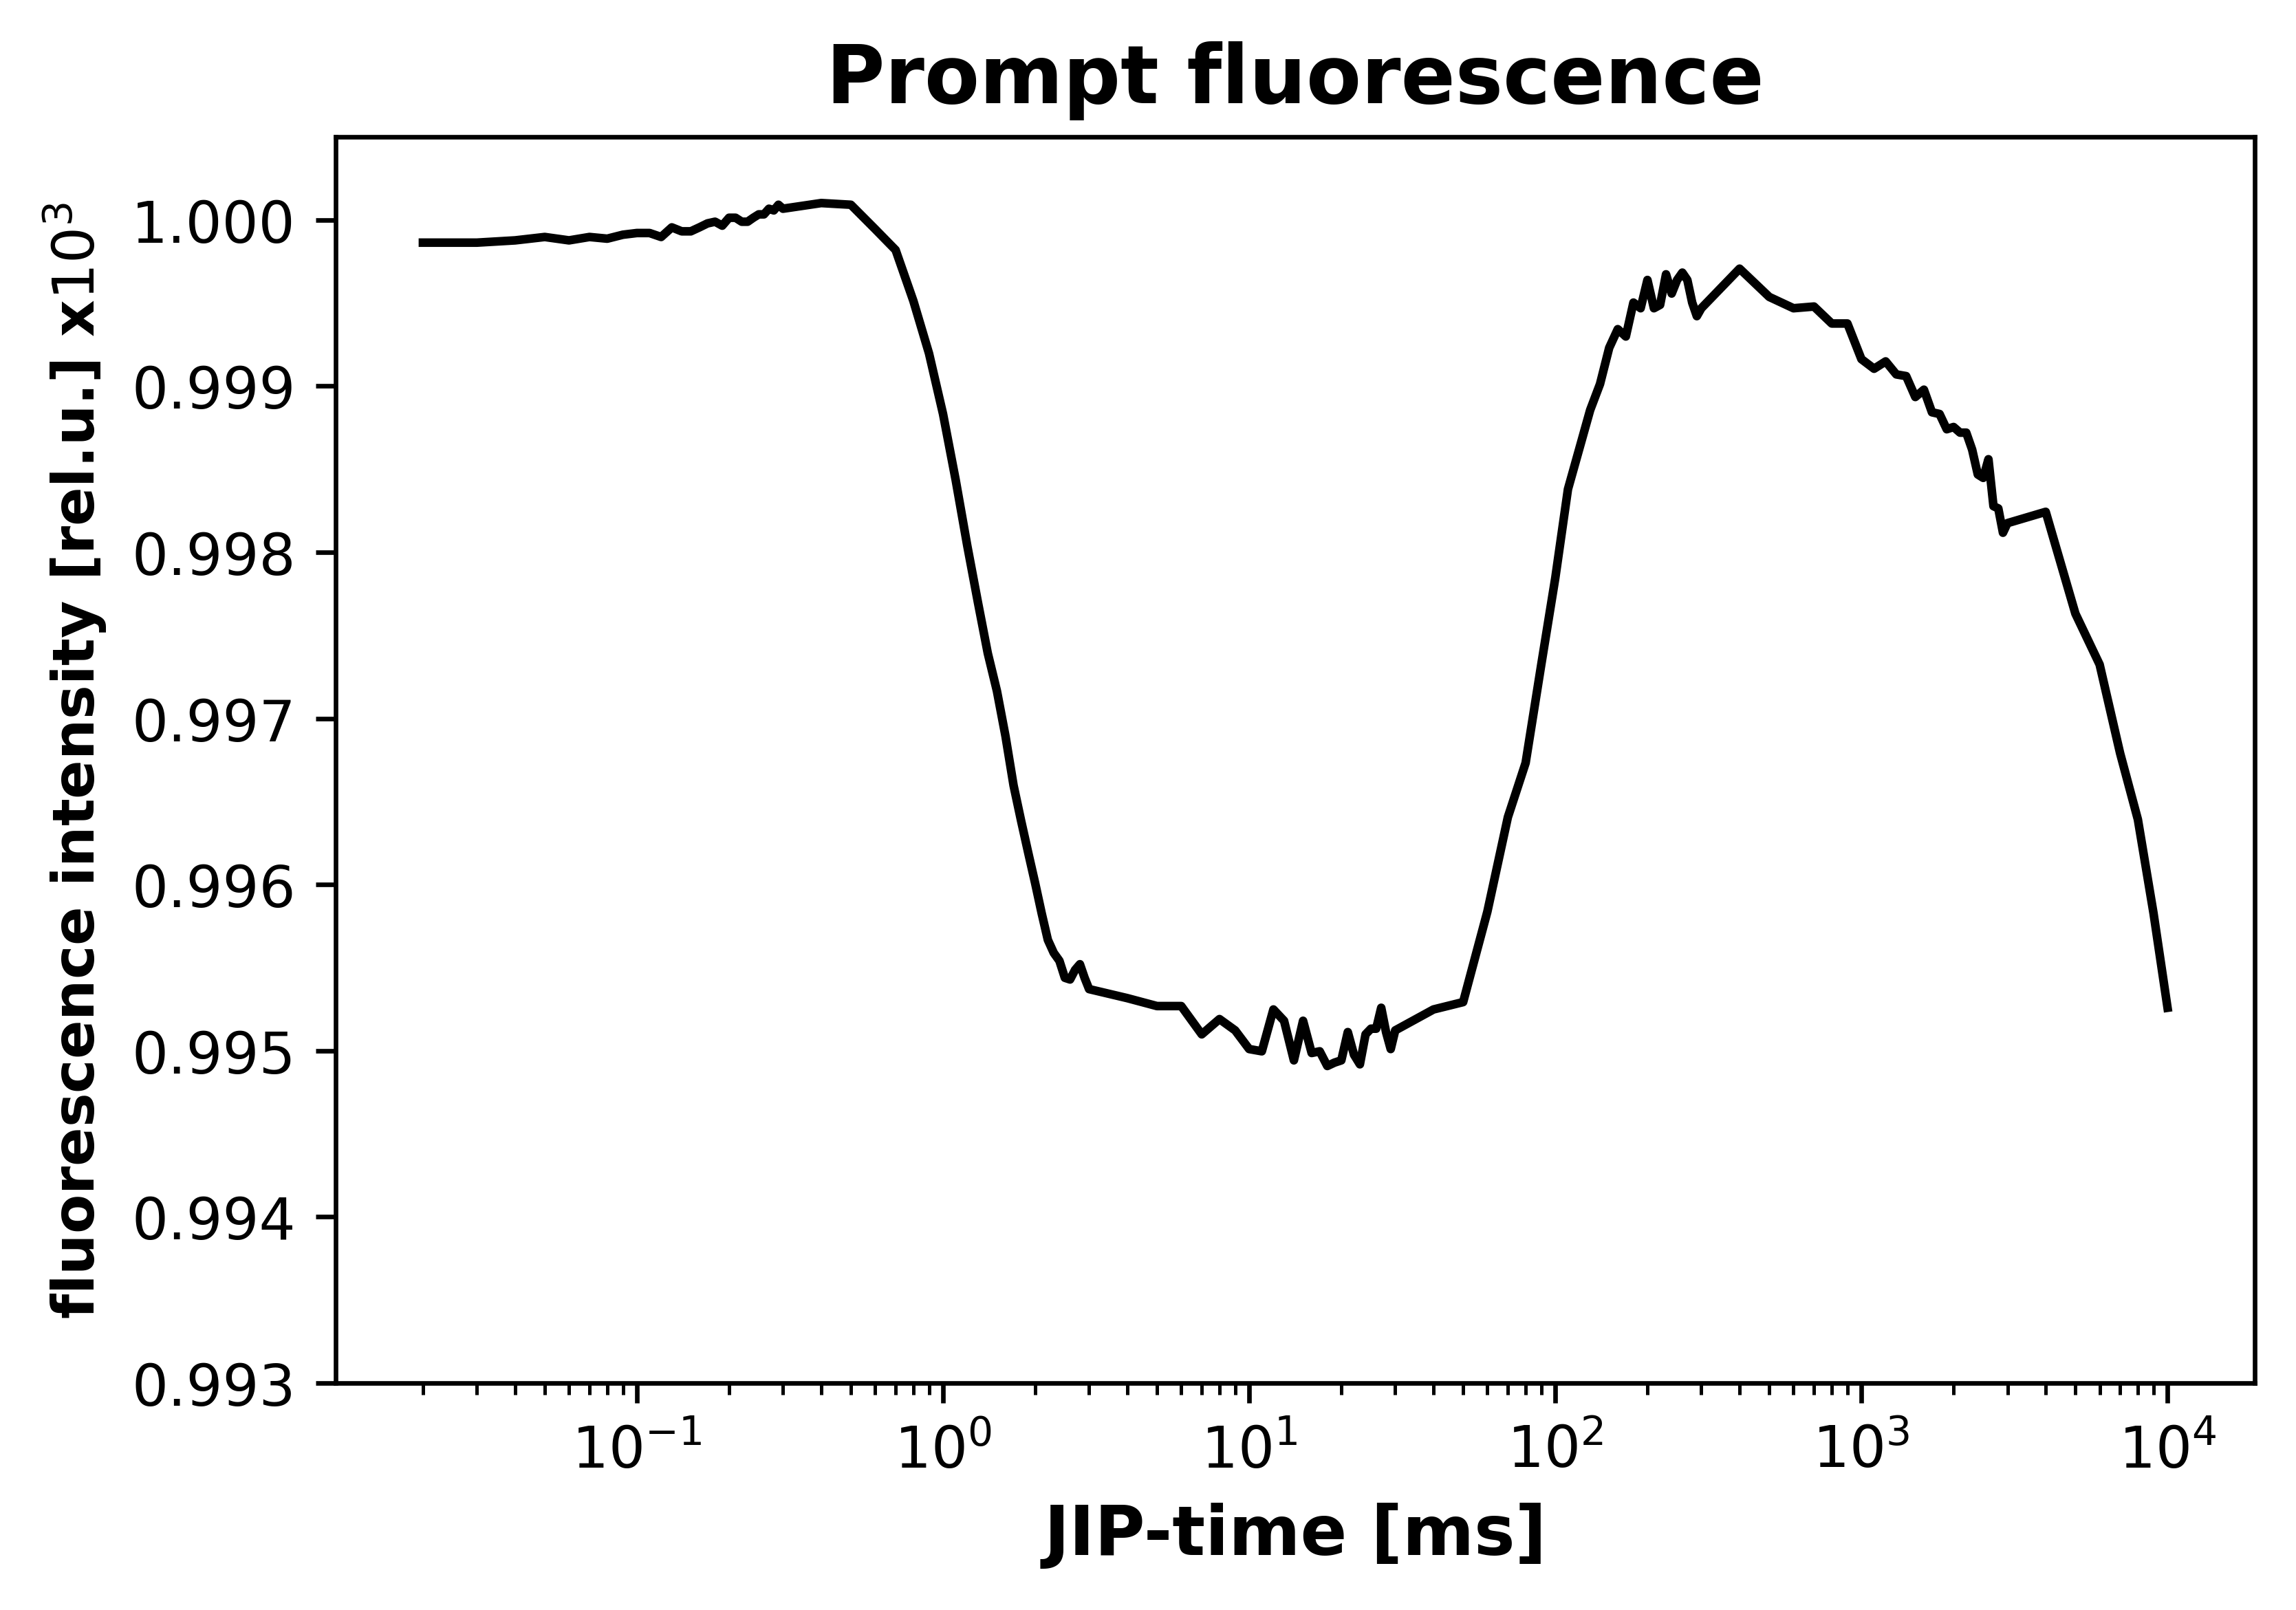

In [ ]:
Draw_plot(df_MR)
Format_graph('PF')
plt.ylim(ymin=0.993, ymax=1.0005)
plt.show()

In [ ]:
from matplotlib.lines import Line2D

def Draw_line(x, y, c):
  line = Line2D(x, y, lw=15., color=c, alpha=1)
  plt.gca().add_line(line) #plt.axes().add_line(line)

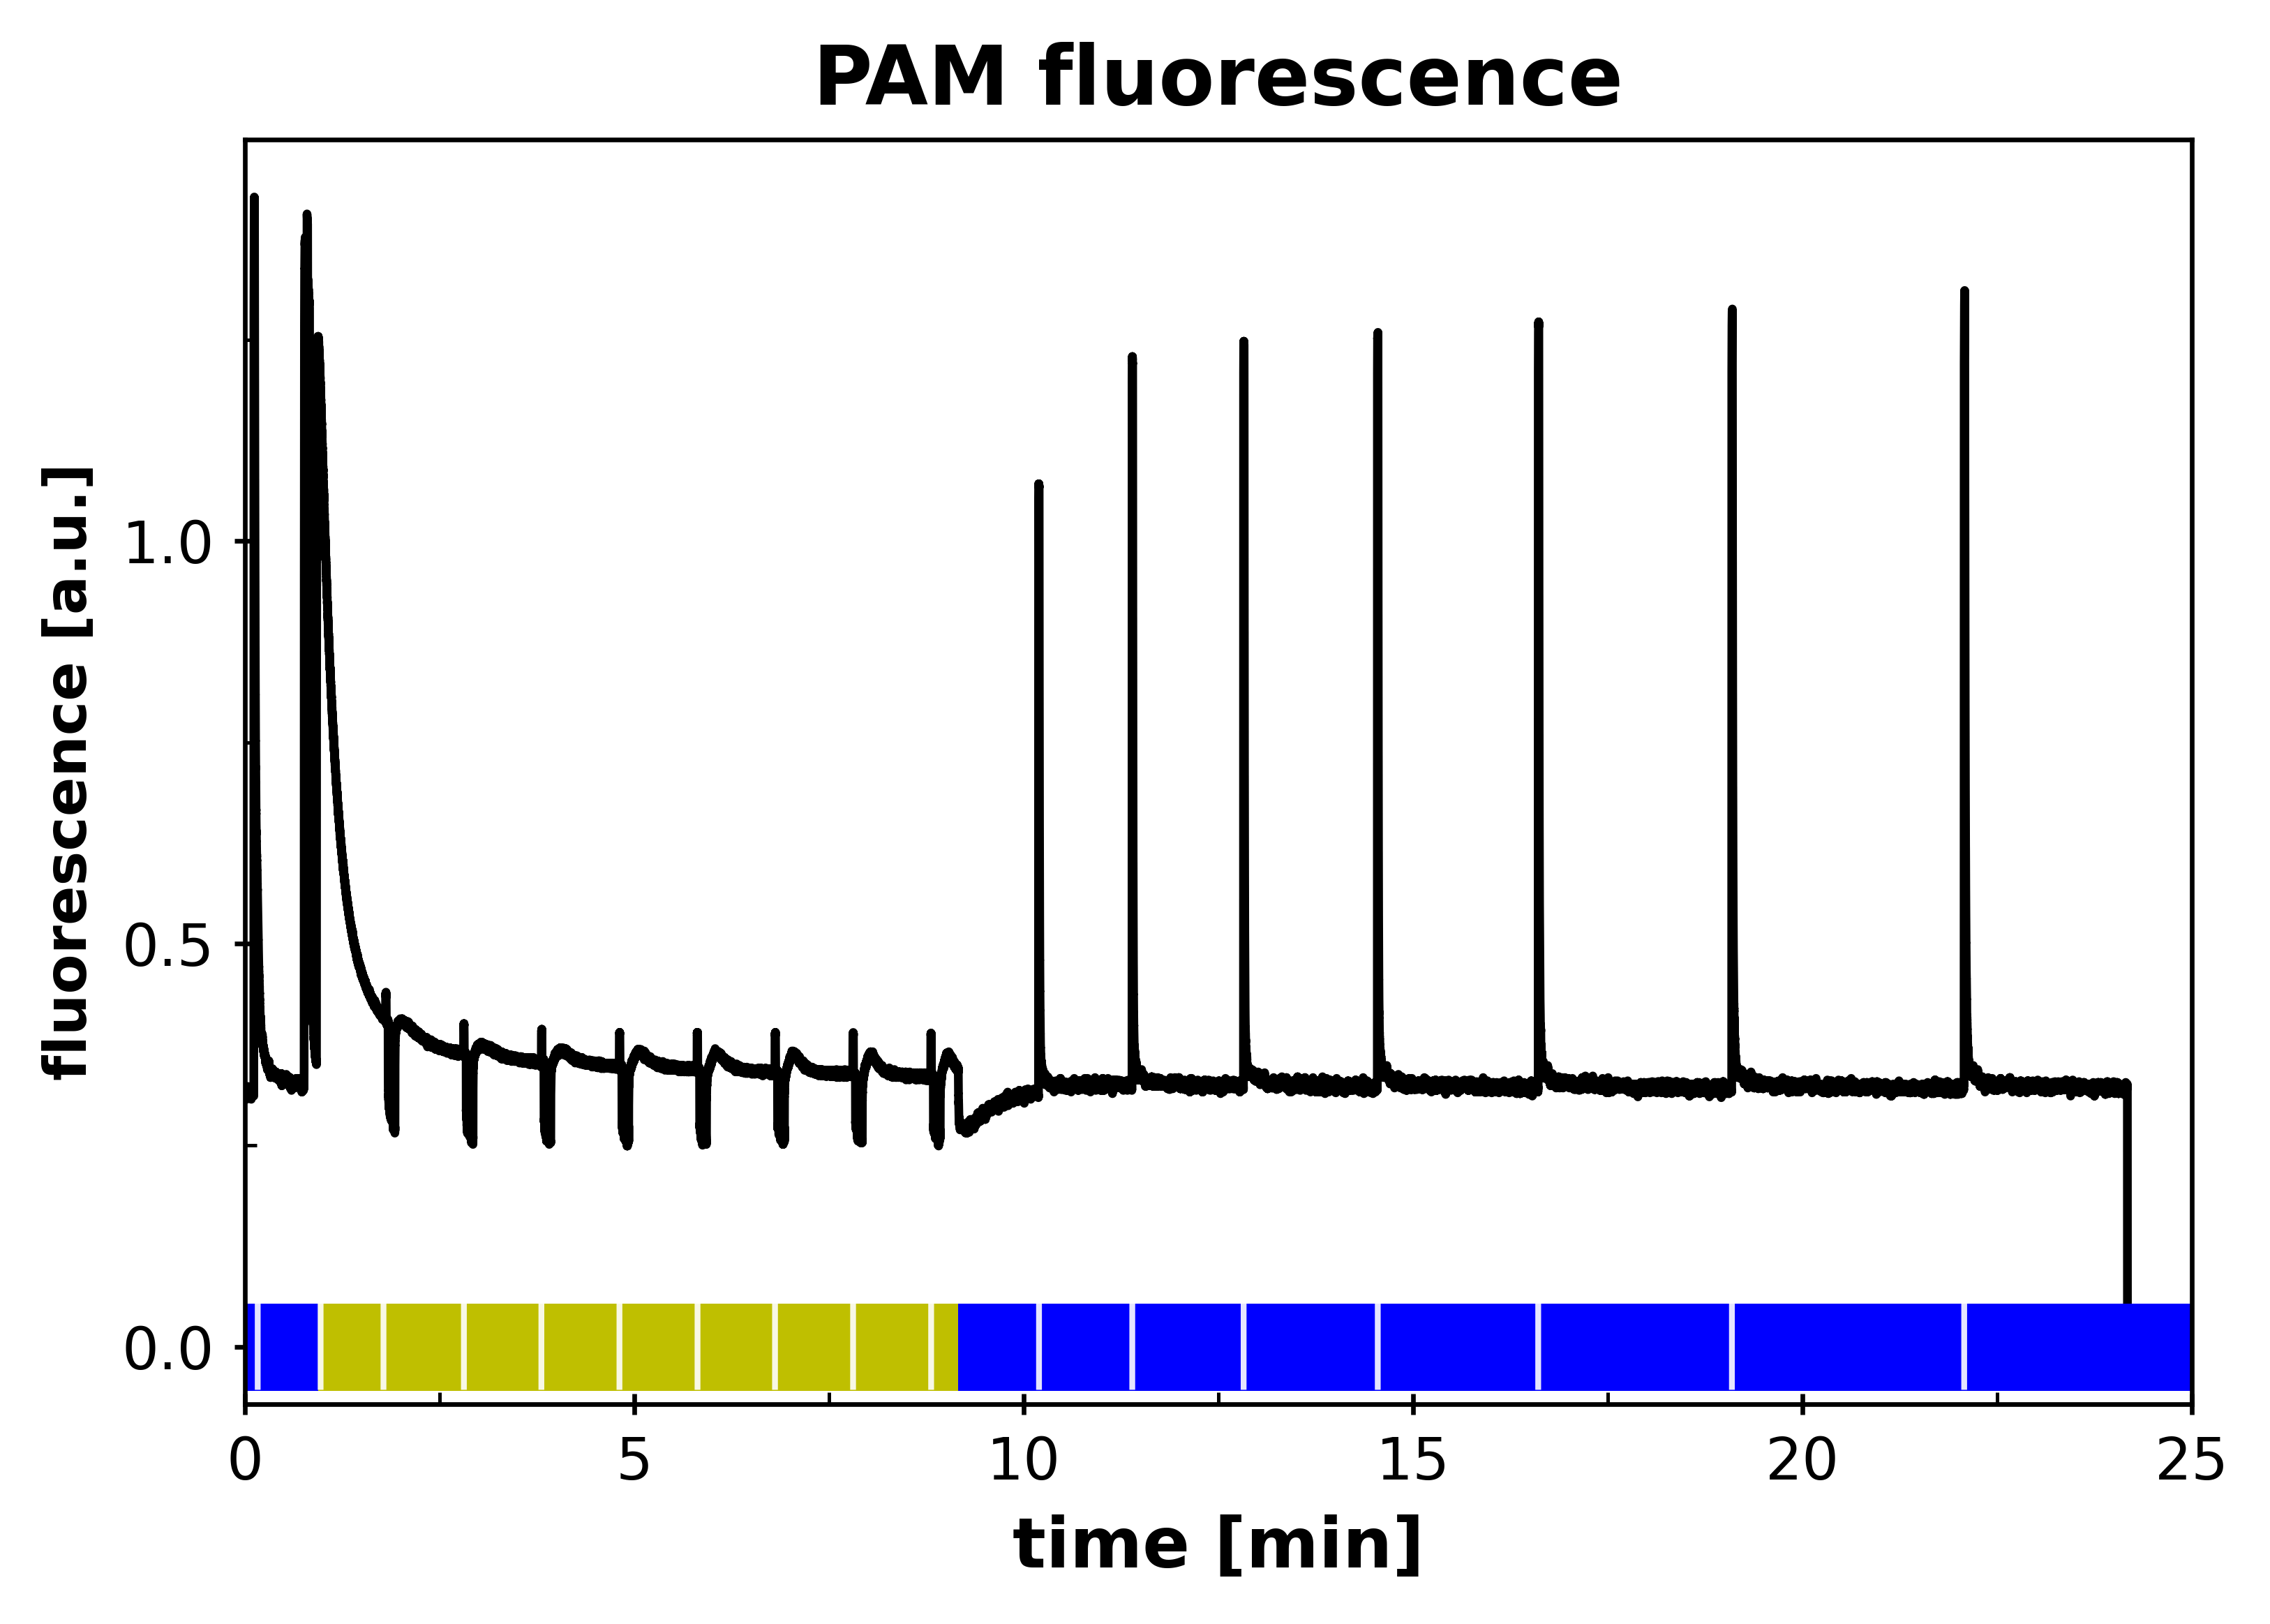

In [ ]:
#PAM
Draw_plot(df_PAM)
Format_graph('PAM')
Format_axes()

Ticker(2.5, ticker='minor', axis='x')
Ticker(0.25, ticker='minor', axis='y')
Ticker(0.5, ticker='major', axis='y')

x,y = np.array([[-0.5, 24.8], [0.0, 0.0]])
Draw_line(x, y, 'b')
x,y = np.array([[1.5, 8.6], [0.0, 0.0]])
Draw_line(x, y, 'y')

i = 1000
while(i < df_PAM['F'].size-12000):
  if df_PAM['F'][i] > 0.38:
    line = Line2D([df_PAM['Time'][i-1], df_PAM['Time'][i]], [-0.05, 0.05], lw=1., color='w', alpha=0.9)
    plt.gca().add_line(line)

    i += 4800
  i += 45

plt.show()